In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Me\Python\Dataset\data\data.csv',index_col=0)
#df.head()

In [92]:
#df.columns

### 1. Dream Team

In [3]:
df1 = df[(df['Potential'] >= 89) & (df['International Reputation'] >= 3.0)][['Name','Age','Nationality','Position','Potential','Overall','International Reputation','Club']].sort_values(by=['Overall','Potential','International Reputation'],ascending=False).groupby('Position').head(2)
#df1

In [4]:
df_CB = df1[df1['Position'].isin(['CB'])]
df_CB

,Name,Age,Nationality,Position,Potential,Overall,International Reputation,Club
12,D. Godín,32,Uruguay,CB,90,90,3.0,Atlético Madrid
42,S. Umtiti,24,France,CB,92,87,3.0,FC Barcelona


In [6]:
#4-3-3
df2 = df1[df1['Position'].isin(['ST','LW','RW','RCM','LCM','CAM','LCB','RCB','GK'])]
my_dreamdf = df2.sort_values(by=['Overall','Potential','International Reputation'],ascending=False).groupby('Position').head(1)
my_dreamdf.append(df_CB).reset_index()

,index,Name,Age,Nationality,Position,Potential,Overall,International Reputation,Club
0,1,Cristiano Ronaldo,33,Portugal,ST,94,94,5.0,Juventus
1,2,Neymar Jr,26,Brazil,LW,93,92,5.0,Paris Saint-Germain
2,3,De Gea,27,Spain,GK,93,91,4.0,Manchester United
3,4,K. De Bruyne,27,Belgium,RCM,92,91,4.0,Manchester City
4,8,Sergio Ramos,32,Spain,RCB,91,91,4.0,Real Madrid
5,11,T. Kroos,28,Germany,LCM,90,90,4.0,Real Madrid
6,17,A. Griezmann,27,France,CAM,90,89,4.0,Atlético Madrid
7,24,G. Chiellini,33,Italy,LCB,89,89,4.0,Juventus
8,60,R. Sterling,23,England,RW,89,86,3.0,Manchester City
9,12,D. Godín,32,Uruguay,CB,90,90,3.0,Atlético Madrid


### 2. Analyse which Club or National Team has the best-rated players

In [284]:
#Best Club by Player count in TOP 50
def best_rated_players(arg):
    print(arg)
    df3 = df.sort_values(by=['Overall','Potential','International Reputation'], ascending=False).head(50)
    #print(df3)
    print(df3[arg].value_counts().head(1))

if __name__ == '__main__':
    best_rated_players('Club')


Club
Real Madrid    9
Name: Club, dtype: int64


In [272]:
#TOP 10 Clubs
top_rated_clubs = df.groupby('Club').agg({'Overall': 'mean'}).reset_index().sort_values(by='Overall',ascending=False).head(10)

#LAST 10 Clubs
lowest_rated_clubs = df.groupby('Club').agg({'Overall': 'mean'}).reset_index().sort_values(by='Overall').head(10)

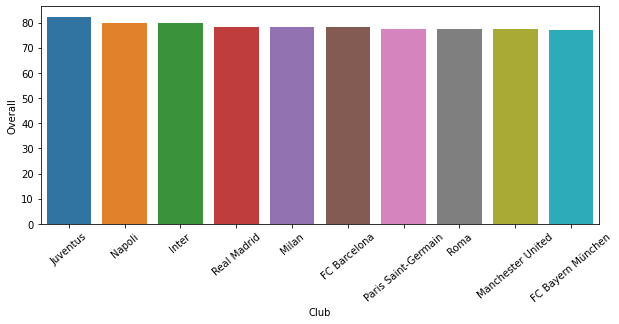

In [274]:
fig=plt.figure(figsize=(10,4))
plt.tick_params(axis='x',
               labelsize='medium',
               rotation=40)
sns.barplot(x="Club",y="Overall",data=top_rated_clubs)

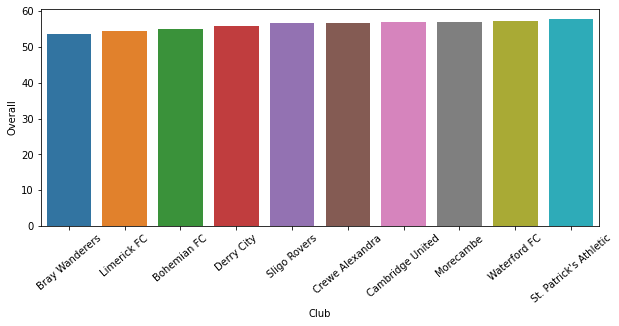

In [263]:
fig=plt.figure(figsize=(10,4))
plt.tick_params(axis='x',
               labelsize='medium',
               rotation=40)
sns.barplot(x="Club",y="Overall",data=lowest_rated_clubs)

### Assess the strength of a team at a particular position

In [527]:
re.__version__

'2.2.1'

In [11]:
dft = pd.DataFrame({'A': ['bat', 'foo', 'bait'],
                   'B': ['abc', 'bar', 'xyz']})
dft.replace(to_replace=r'^ba.$', value='new', regex=True)
dft

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


### Analyse the team with the best dribbling speed

In [286]:
df4 = df.groupby('Club').agg({'Dribbling': 'mean'}).reset_index().sort_values(by='Dribbling', ascending=False).head(10)
df4

,Club,Dribbling
326,Juventus,69.520000
435,Paris Saint-Germain,68.833333
398,Napoli,68.640000
363,Liverpool,68.212121
86,Borussia Dortmund,68.151515
26,Ajax,67.900000
232,FC Porto,67.357143
382,Milan,67.222222
375,Manchester United,66.878788
374,Manchester City,66.151515


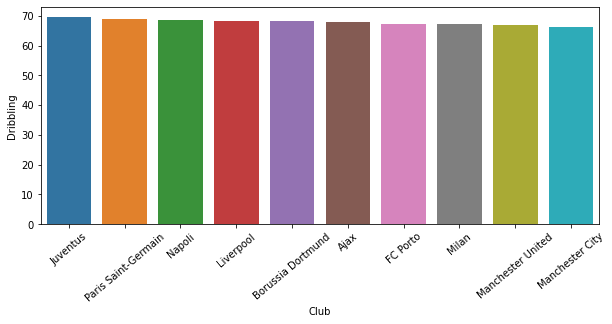

In [287]:
fig=plt.figure(figsize=(10,4))
plt.tick_params(axis='x',
               labelsize='medium',
               rotation=40)
sns.barplot(x="Club",y="Dribbling",data=df4)

### Co-relate between Age and Overall rating

In [472]:
import plotly.express as px
import plotly.graph_objects as go

In [334]:
#!pip install --user --proxy=websurfing1-tin1.esi.adp.com:8080 seaborn==0.9.0

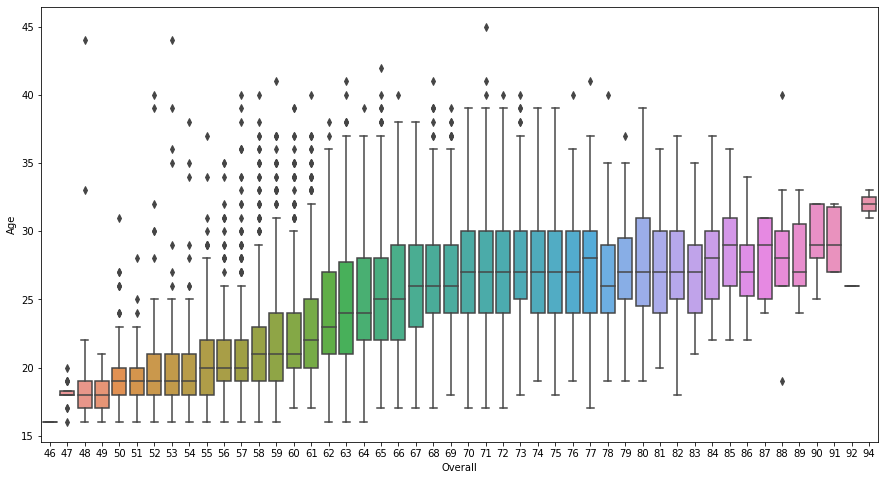

In [402]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Overall',y='Age',data=df)

In [399]:
#Check by mean value
df5 = df[['Age','Overall']].groupby('Age')['Overall'].mean().reset_index()

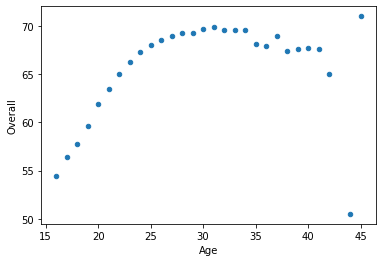

In [367]:
df5.plot.scatter(x='Age',y='Overall')

### Co-relate between Age and Nationality

In [460]:
df6 = df.groupby('Nationality')['Age'].mean().reset_index()

#Oldest players by avg in a country
df6_old = df6.sort_values(by='Age',ascending=False).head(10)

#Youngest players by avg in a country
df6_young = df6.sort_values(by='Age').head(10)

,Nationality,Age
74,Indonesia,17.000000
19,Botswana,20.000000
129,Rwanda,21.000000
148,Tanzania,22.000000
162,Zambia,22.222222
28,Chad,22.500000
0,Afghanistan,22.500000
5,Antigua & Barbuda,22.750000
42,Dominican Republic,23.000000
99,Mauritania,23.000000


In [484]:
fig = px.scatter(data_frame=df6_young,x='Nationality',y='Age',width=500,height=300)
fig.update_traces(mode="markers+lines")

In [451]:
#TOP 10 Nationalities by Overall rating and AGE distribution
df7 = df.groupby('Nationality').agg({'Overall':'mean','Name':'count'}).reset_index().sort_values(by='Overall',ascending=False).head(10)

#LAST 10 Nationalities by Overall rating and AGE distribution
df8 = df.groupby('Nationality')['Overall'].mean().reset_index().sort_values(by='Overall').head(10)

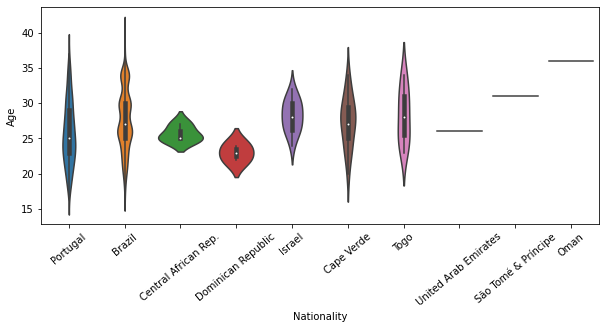

In [487]:
#TOP Teams
df_topteams_age = df[df['Nationality'].isin(df7['Nationality'])]
plt.figure(figsize=(10,4))
plt.tick_params(axis='x',
               labelsize='medium',
               rotation=40)
sns.violinplot(x='Nationality',y='Age',data=df_topteams_age)

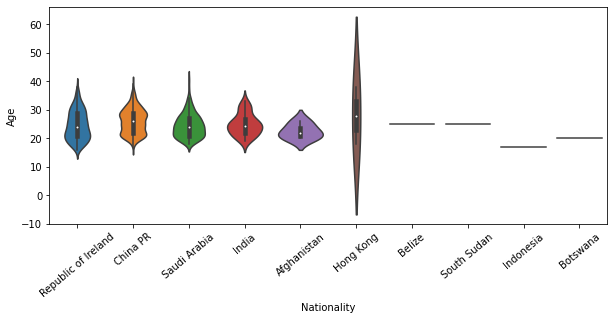

In [486]:
#LAST teams
df_bottomteams_age = df[df['Nationality'].isin(df8['Nationality'])]
plt.figure(figsize=(10,4))
plt.tick_params(axis='x',
               labelsize='medium',
               rotation=40)
sns.violinplot(x='Nationality',y='Age',data=df_bottomteams_age)

AttributeError: 'Rectangle' object has no property 'normed'

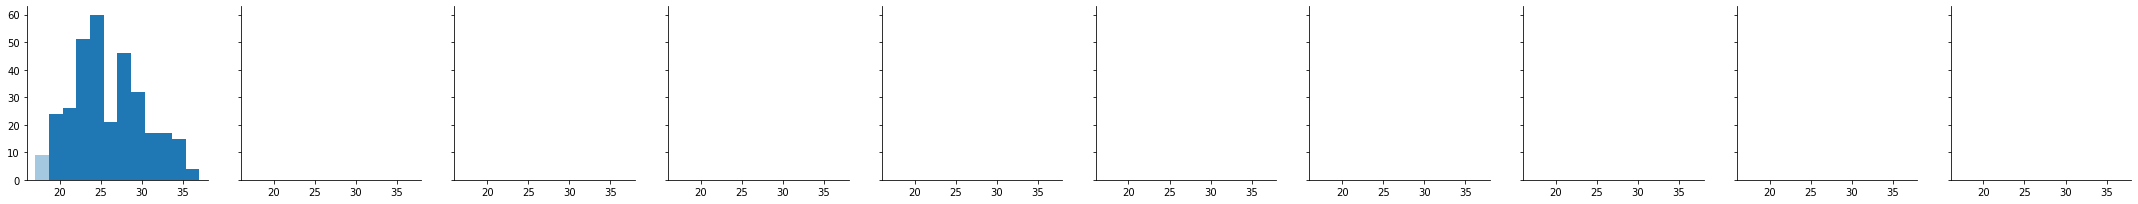

In [497]:
g = sns.FacetGrid(data=df_topteams_age,col='Nationality')
g.map(sns.distplot,'Age') # ????????

### Co-relate between Age and Potential

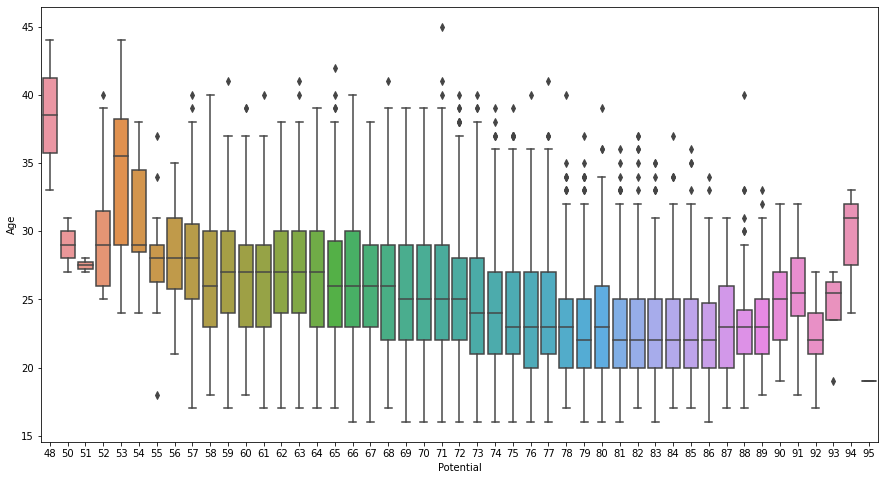

In [401]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Potential',y='Age',data=df)

<Figure size 1080x576 with 0 Axes>

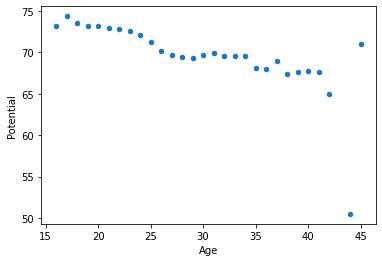

In [398]:
#Check by mean values
df6 = df.groupby('Age')['Potential'].mean().reset_index()
df6.sort_values(by='Potential', ascending=False)
#plt.figure(figsize=(15,8))
df6.plot.scatter(x='Age',y='Potential')